In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as st
from sklearn.linear_model import LinearRegression
from datetime import datetime 

In [2]:
data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
display(data)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,765,844,851,852,852,852,852,852,852,852
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,86,86,86,86,86,88,91,92,96,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,484,484,484,485,499,499,513,513,514,611
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,354,399,419,453,469,482,484,496,524,560
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,106,132,132,132,132,141,141,141,141,162
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,4013,4100,4191,4289,4370,4453,4529,4609,4690,4763


In [3]:
data[data[""]].loc[:,"3/31/20"]

0      174
1      243
2      716
3      376
4        7
      ... 
261      0
262      0
263      0
264      0
265      0
Name: 3/31/20, Length: 266, dtype: int64

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3095,3098,3104,3104,3106,3110,3110,3109,3112,3114
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1058,1058,1059,1059,1060,1060,1061,1061,1062,1062
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,440,440,440,440,440,440,440,440,440,440
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,228,228,228,228,228,228,228,228,228,228
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1649,1653,1663,1670,1678,1681,1681,1685,1687,1687
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,586,589,591,592,592,592,596,599,599,599


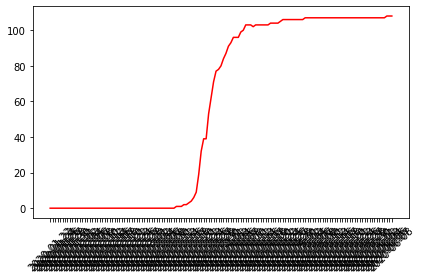

In [3]:
japan = data[data["Country/Region"] == "Australia"]
display(japan)
time_ser = japan.iloc[:,4:]
#display(list(time_ser.iloc[0]))
fig, ax = plt.subplots()
fig.canvas.draw()
col = time_ser.iloc[0]
dates=list(time_ser)
date_object = datetime.strptime(dates[0], '%m/%d/%y')
x_values = [datetime.strptime(str(d),"%m/%d/%y").date() for d in dates]

plt.plot(dates, col, c = "red")

ax.set_xticklabels(x_values, rotation=45)
plt.tight_layout()

plt.show()


In [4]:
da = pd.read_csv("csse_covid_19_data/csse_covid_19_daily_reports/03-31-2020.csv")
au = da[da["Country_Region"] == "Australia"]
display(au)
T_R=sum(list(da["Recovered"]))
T_D=sum(list(da["Deaths"]))
T_C=sum(list(da["Confirmed"]))
AU_R=sum(list(au["Recovered"]))
AU_D=sum(list(au["Deaths"]))

AU_A=sum(list(au["Active"]))
AU_C=sum(list(au["Confirmed"]))
print("Confirmed in AU: ",sum(list(au["Confirmed"])))
print("Recovered in AU: ",sum(list(au["Recovered"])))
print("Deaths in AU:    ",sum(list(au["Deaths"])))
print("Total Confirmed: ",sum(list(da["Confirmed"])))
print("Total Recovered: ",sum(list(da["Recovered"])))
print("Total Deaths:    ",sum(list(da["Deaths"])))
print("Total Active:    ",sum(list(da["Active"])))
print("Recover Rate:    ",np.round(T_R*100/T_C,3),"%")
print("Deaths Rate:     ",np.round(T_D*100/T_C,3),"%")
print("AU Recover Rate: ",np.round(AU_R*100/AU_C,3),"%")
print("AU Active Rate:  ",np.round(AU_A*100/AU_C,3),"%")   
print("AU Deaths Rate:  ",np.round(AU_D*100/AU_C,3),"%")        

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2176,NaN,NaN,Australian Capital Territory,Australia,2020-03-31 23:49:27,-35.4735,149.0124,80,1,3,76,"Australian Capital Territory, Australia"
2221,NaN,NaN,New South Wales,Australia,2020-03-31 23:49:27,-33.8688,151.2093,2032,8,4,2020,"New South Wales, Australia"
2225,NaN,NaN,Northern Territory,Australia,2020-03-31 23:49:27,-12.4634,130.8456,17,0,0,17,"Northern Territory, Australia"
2233,NaN,NaN,Queensland,Australia,2020-03-31 23:49:27,-27.4698,153.0251,743,2,8,733,"Queensland, Australia"
2245,NaN,NaN,South Australia,Australia,2020-03-31 23:49:27,-34.9285,138.6007,337,0,6,331,"South Australia, Australia"
2247,NaN,NaN,Tasmania,Australia,2020-03-31 23:49:27,-42.8821,147.3272,69,1,5,63,"Tasmania, Australia"
2251,NaN,NaN,Victoria,Australia,2020-03-31 23:49:27,-37.8136,144.9631,917,4,291,622,"Victoria, Australia"
2253,NaN,NaN,Western Australia,Australia,2020-03-31 23:49:27,-31.9505,115.8605,364,2,41,321,"Western Australia, Australia"


Confirmed in AU:  4559
Recovered in AU:  358
Deaths in AU:     18
Total Confirmed:  857487
Total Recovered:  178028
Total Deaths:     42107
Total Active:     453243
Recover Rate:     20.762 %
Deaths Rate:      4.911 %
AU Recover Rate:  7.853 %
AU Active Rate:   91.753 %
AU Deaths Rate:   0.395 %
